In this notebook, we will learn about the whylogs Python library and its output. 

# Getting Started with whylogs Profile Summaries

We will first read sample raw data into Pandas from a file and explore that data briefly. To run whylogs, we will then import the whylogs library, initialize a logging session with whylogs, and create a profile for our data, producing a whylogs profile summary. Finally, we will explore some of the profile summary features.

To get started, we will import a few standard data science Python libraries.

In [1]:
pip install -r requirements.txt

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [3]:
import datetime
import os.path
import pandas as pd

whylogs allows you to generate and store key characteristics of a growing dataset efficiently. In machine learning, datasets often consist of both input features and outputs of the model. In deployed systems, you often have a relatively static training dataset as well as a growing dataset from model input and output at inference time.

## Downloading and exploring the raw Lending Club data

In our case, we will download and explore a sample from the Lending Club dataset before logging a whylogs profile summary. Lending Club is a peer-to-peer lending and alternative investing website on which members can apply for personal loans and invest in personal loans to other Lending Club members. The company published a dataset with information spanning several years. This particular dataset contains only the accepted loans.

Our sample input data is stored in `lending_club_demo.csv`. You may use the Jupyter command `!` in front of cell contents to execute a Bash command (e.g. `cd`) to navigate if necessary.

In [4]:
data_file = "lending_club_demo.csv"

Let's read that data file into a Pandas dataframe and look at the entries for *January 2017*.

Each row refers to a particular loan instance, while each column refers to a variable in our dataset.

In [5]:
full_data = pd.read_csv(os.path.join(data_file))
data = full_data[full_data['issue_d'] == 'Jan-2017']

data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,3.090000e+02,0.0,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,9.637541e+07,NaN,14511.407767,14511.407767,14506.957929,13.479159,446.427476,80151.667184,18.561489,0.372168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.648219e+06,NaN,9011.801950,9011.801950,9011.257397,5.168002,280.454947,51337.356187,9.955114,0.929671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.895309e+07,NaN,1000.000000,1000.000000,1000.000000,5.320000,32.930000,10000.000000,0.290000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.627937e+07,NaN,7500.000000,7500.000000,7500.000000,10.490000,235.260000,49680.000000,12.480000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.653771e+07,NaN,12000.000000,12000.000000,12000.000000,12.740000,370.480000,66000.000000,18.100000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.681416e+07,NaN,20000.000000,20000.000000,20000.000000,15.990000,582.260000,98000.000000,23.350000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,9.752976e+07,NaN,40000.000000,40000.000000,40000.000000,30.940000,1400.690000,400000.000000,109.220000,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Interesting Lending Club dataset variables

**`emp_length` (categorical, string)**:
> length of employment in years as text entries

**`annual_inc` (numeric)**:
> the self-reported annual income provided by the borrower during registration

**`dti` (numeric)**:
> ratio calculated using the borrower’s total monthly debt payments over their total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income

**`issue_d` (timestamp, string)**:
> the month (and year) which the loan was funded -- useful for backfilling data

## Running whylogs for logging a single dataset

Let's import a function from whylogs that will allow us to create a logging session.

This session can be connected with multiple writers that output the results of our profiling in JSON, a flat CSV, or binary protobuf format. These profiles can be stored locally or in an AWS S3 bucket in the cloud. Additional writing functionality will be added over time.

Let's create a default session below.

In [6]:
from whylogs import get_or_create_session

session = get_or_create_session()

# Quickly log a dataframe

You can call `log_dataframe` to quickly log a Pandas dataframe

In [7]:
session.log_dataframe(data.head(100), 'demo')

# whylogs output

Now that we've logged our dataset, we can see the output of the whylogs profiling process in the newly created directory. WhyLogs logger creates an `output` directory within our original directory. This directory in turn contains folders with various summaries for our sample dataset called `demo`.

In [8]:
print("Current working directory:", os.getcwd())

Current working directory: /Volumes/Workspace/whylogs-examples/python


In [9]:
!find whylogs-output -type f

whylogs-output/demo/dataset_summary/freq_numbers/dataset_summary-batch.json
whylogs-output/demo/dataset_summary/json/dataset_summary-batch.json
whylogs-output/demo/dataset_summary/flat_table/dataset_summary-batch.csv
whylogs-output/demo/dataset_summary/histogram/dataset_summary-batch.json
whylogs-output/demo/dataset_summary/frequent_strings/dataset_summary-batch.json
whylogs-output/demo/dataset_profile/protobuf/datase_profile-batch.bin
whylogs-output/another-dataset/dataset_summary/freq_numbers/dataset_summary-1498867200000.json
whylogs-output/another-dataset/dataset_summary/freq_numbers/dataset_summary-1600732800000.json
whylogs-output/another-dataset/dataset_summary/json/dataset_summary-1498867200000.json
whylogs-output/another-dataset/dataset_summary/json/dataset_summary-1600732800000.json
whylogs-output/another-dataset/dataset_summary/flat_table/dataset_summary-1498867200000.csv
whylogs-output/another-dataset/dataset_summary/flat_table/dataset_summary-1600732800000.csv
whylogs-outp

## Using the Logger API
The Logger API can be used to log data profiles to memory as well. This data stays in memory until you call `.close()`, either explicitly or using the `with` statement.

In [10]:
with session.logger(dataset_name="another-dataset", dataset_timestamp=datetime.datetime(2017, 1, 1, 0, 0)) as logger:
    logger.log_dataframe(data.head(100))

In this example, you can see that the dataset has the timestamp added as the suffix.

In [11]:
!find whylogs-output -type f

whylogs-output/demo/dataset_summary/freq_numbers/dataset_summary-batch.json
whylogs-output/demo/dataset_summary/json/dataset_summary-batch.json
whylogs-output/demo/dataset_summary/flat_table/dataset_summary-batch.csv
whylogs-output/demo/dataset_summary/histogram/dataset_summary-batch.json
whylogs-output/demo/dataset_summary/frequent_strings/dataset_summary-batch.json
whylogs-output/demo/dataset_profile/protobuf/datase_profile-batch.bin
whylogs-output/another-dataset/dataset_summary/freq_numbers/dataset_summary-1483228800000.json
whylogs-output/another-dataset/dataset_summary/freq_numbers/dataset_summary-1498867200000.json
whylogs-output/another-dataset/dataset_summary/freq_numbers/dataset_summary-1600732800000.json
whylogs-output/another-dataset/dataset_summary/json/dataset_summary-1483228800000.json
whylogs-output/another-dataset/dataset_summary/json/dataset_summary-1498867200000.json
whylogs-output/another-dataset/dataset_summary/json/dataset_summary-1600732800000.json
whylogs-output

## Interacting with Dataset Profiles

Instead of interacting with the Logger, which writes to disk, sometimes you may want to use a `DatasetProfile` object directly.

You can use `session.new_profile` to create an empty profile:

In [12]:
profile = session.new_profile(dataset_name="in-memory", 
                              dataset_timestamp=datetime.datetime(2017, 1, 1, 0, 0))

## Profiling a DataFrame

In [13]:
profile.track_dataframe(data)

This DatasetProfile object, stored in the `profile` variable, can now be referenced from Python.

This object contains helpful information about the profile, such as the session ID, the dates associated with both the data and the session, as well as user-specified metadata and tags.

First, let's transform the dataset profile into the flat summary form. Unlike the binary `protobuf.bin` file and the hierarchical `whylogs.json` file that was written using the logger, the summary format makes it much easier to analyze and run data science processes on the data. This structure is much more flat, a table format or a single depth dictionary format organized by variable.

These less hierarchical formats were also created with the `log_dataframe` functionality and can be found in the `summary_summary.csv`, `summary_histogram.json` and `summary_strings.json` files.

In [14]:
summaries = profile.flat_summary()

Let's first take a look at the overall summary for the profiled dataset.

In [15]:
summary = summaries['summary']
summary

,column,count,null_count,bool_count,numeric_count,max,mean,min,stddev,nunique_numbers,...,nunique_str_upper,quantile_0.0000,quantile_0.0100,quantile_0.0500,quantile_0.2500,quantile_0.5000,quantile_0.7500,quantile_0.9500,quantile_0.9900,quantile_1.0000
0,sec_app_open_act_il,309.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bc_open_to_buy,309.0,0.0,0.0,305.0,96285.0,11781.862295,0.0,15110.810631,302.0,...,0.0,0.000000,10.000000,155.000000,2004.000000,6784.000000,15545.000000,43811.0,74544.0,96285.0
2,mths_since_rcnt_il,309.0,0.0,0.0,304.0,228.0,23.013158,1.0,27.996225,70.0,...,0.0,1.000000,1.000000,3.000000,7.000000,14.000000,27.000000,86.0,130.0,228.0
3,sec_app_collections_12_mths_ex_med,309.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chargeoff_within_12_mths,309.0,0.0,0.0,309.0,1.0,0.003236,0.0,0.056888,2.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,settlement_percentage,309.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,pymnt_plan,309.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,total_rec_prncp,309.0,0.0,0.0,309.0,35000.0,5266.577896,262.7,6502.059928,276.0,...,0.0,262.700012,349.440002,848.909973,1697.630005,2965.600098,5597.330078,20000.0,35000.0,35000.0
148,all_util,309.0,0.0,0.0,309.0,117.0,56.757282,2.0,21.046084,87.0,...,0.0,2.000000,10.000000,18.000000,43.000000,58.000000,72.000000,89.0,106.0,117.0


### Using the streaming mode

It's convenient to call whylogs on a batch of data with a Pandas dataframe. However, in practice you might have only individual data points. In that case, `whylogs` can be called on each individual datum (Python dictionary object in this case).

The following example shows how we can stream through individual data points by iterating with a dataframe and extracting rows as an object:

In [16]:
profile2 = session.new_profile(dataset_name="in-memory", 
                              dataset_timestamp=datetime.datetime(2017, 1, 1, 0, 0))
for i, row in data.iterrows():
    profile2.track(row.to_dict())

The counter should now be updated incrementally, and the two profiles can be merged:

In [17]:
merged_profile = profile.merge(profile2)

Streaming mode isn't limited to just the API. We can also merge the profiles across different sessions to get a holistic view:

In [18]:
print(profile.columns['dti'].counters.count)
print(profile2.columns['dti'].counters.count)
print(merged_profile.columns['dti'].counters.count)

309
309
618


## whylogs output

We can see that this summary object is much smaller at **roughly 150 rows x 32 columns** than the original dataset at **1000 rows x 151 columns**. Smaller storage sizes are important in reducing costs and making it easier for your data scientists to complete monitoring and post-analysis on large amounts of data.

Each row of our flat profile summary contains the name of the variable found in the original dataset, in the column called `column`.

We can also see a number of useful metrics as columns in our summary: descriptive statistics, type information, unique estimates and bounds, as well as specially formulated metrics like inferred_dtype and dtype_fraction.

Let's explore the output of the whylogs profiler to check on a few of the interesting variables we mentioned earlier. For example, let's look at the  `funded_amnt` variable.

In [19]:
summary[summary['column']=='funded_amnt'].T

,65
column,funded_amnt
count,309.0
null_count,0.0
bool_count,0.0
numeric_count,309.0
max,40000.0
mean,14511.407767
min,1000.0
stddev,9011.80195
nunique_numbers,117.0


You may notice that the count for this variable was recorded as **309** hits, with a minimum loan amount of **$1,000.00 USD** and a maximum loan amount of **\$40,000.00 USD**.

For numerical variables like `funded_amnt`, we can view additional information in the histograms dictionary from the profile summaries object. The variable's histogram object contains bin edges along with counts.

In [20]:
histograms = summaries['hist']
print(histograms['funded_amnt'])

{'bin_edges': [1000.0, 2300.0001333333335, 3600.000266666667, 4900.000400000001, 6200.000533333334, 7500.000666666667, 8800.000800000002, 10100.000933333335, 11400.001066666668, 12700.0012, 14000.001333333334, 15300.001466666668, 16600.001600000003, 17900.001733333334, 19200.00186666667, 20500.002, 21800.002133333335, 23100.00226666667, 24400.0024, 25700.002533333336, 27000.002666666667, 28300.002800000002, 29600.002933333337, 30900.003066666668, 32200.003200000003, 33500.00333333334, 34800.00346666667, 36100.003600000004, 37400.00373333334, 38700.00386666667, 40000.004], 'counts': [7, 12, 11, 34, 14, 19, 32, 8, 24, 9, 22, 14, 9, 9, 24, 7, 3, 5, 8, 2, 5, 3, 5, 3, 2, 0, 15, 0, 0, 3]}


For another variable, `loan_status`, we can discover intriguing information within other metrics. This is because loan status is a categorical field that takes strings as inputs.

Let's look at a few relevant metrics for this and other string variables.

In [21]:
summary[summary['column']=='loan_status'][['type_string_count', 
                                           'type_null_count', 
                                           'nunique_str', 
                                           'nunique_str_lower', 
                                           'nunique_str_upper']]

,type_string_count,type_null_count,nunique_str,nunique_str_lower,nunique_str_upper
138,309.0,0.0,6.0,6.0,6.0


Notice that there are **309** elements of string type. Also, the unique string fields show **6** unique strings. The lower and upper bounds for the estimate are also **6**, meaning that this is an exact number. You will see many instances of this -- DataSketches in whylogs finds exact estimates for numbers as high as 400 unique values.

Let's now explore the frequent strings object from our profile summaries.

In [22]:
frequent_strings = summaries['frequent_strings']
print(frequent_strings['loan_status'])

{'Current': 239, 'Fully Paid': 54, 'Charged Off': 7, 'Late (31-120 days)': 5, 'In Grace Period': 3, 'Late (16-30 days)': 1}


# Writing data to disk

Sometimes you want to write your data out manually rather than relying on the Logger framework (it's more opinionated!), you can perform your own serialization and deserialization.

whylogs uses protobuf for efficient storage. Here's how it works:

In [23]:
profile.write_protobuf("profile.bin")
roundtrip = profile.read_protobuf("profile.bin")

In [24]:
len(roundtrip.columns)

150

## Visualizing multiple datasets across time with whylogs

To use the whylogs visualization tools, we'll need to import the `ProfileVisualizer` object and use the Altair visualization framework.

In [25]:
from whylogs.viz import ProfileVisualizer

viz = ProfileVisualizer()

Now that we've explored data for a single month, let's calculate profile summaries for a series of months. Normally, we'd expect whylogs to be operating on future data, so these new datasets would originate from data seen at inference time.

But in special cases like this demo or diagnosing data collected prior to whylogs integration, it may be helpful to backfill with past data. Here we'll loop through subsets of data to create a list of profile summaries.

In [26]:
# Create a list of data profiles
remaining_dates = ['Feb-2017', 'Mar-2017', 'Apr-2017', 'May-2017', 'Jun-2017']

profiles = [profile]  # list with original profile
for date in remaining_dates:
    timestamp = datetime.datetime.strptime(date, '%b-%Y')
    subset_data = full_data[full_data['issue_d']==date]
    subset_prof = session.profile_dataframe(subset_data, "demo", dataset_timestamp=timestamp)
    profiles.append(subset_prof)

profiles

Let's pass this list of profiles into the visualizer.

In [27]:
viz.set_profiles(profiles)

We can now explore temporal visualizations of our profiles at a quick glance.

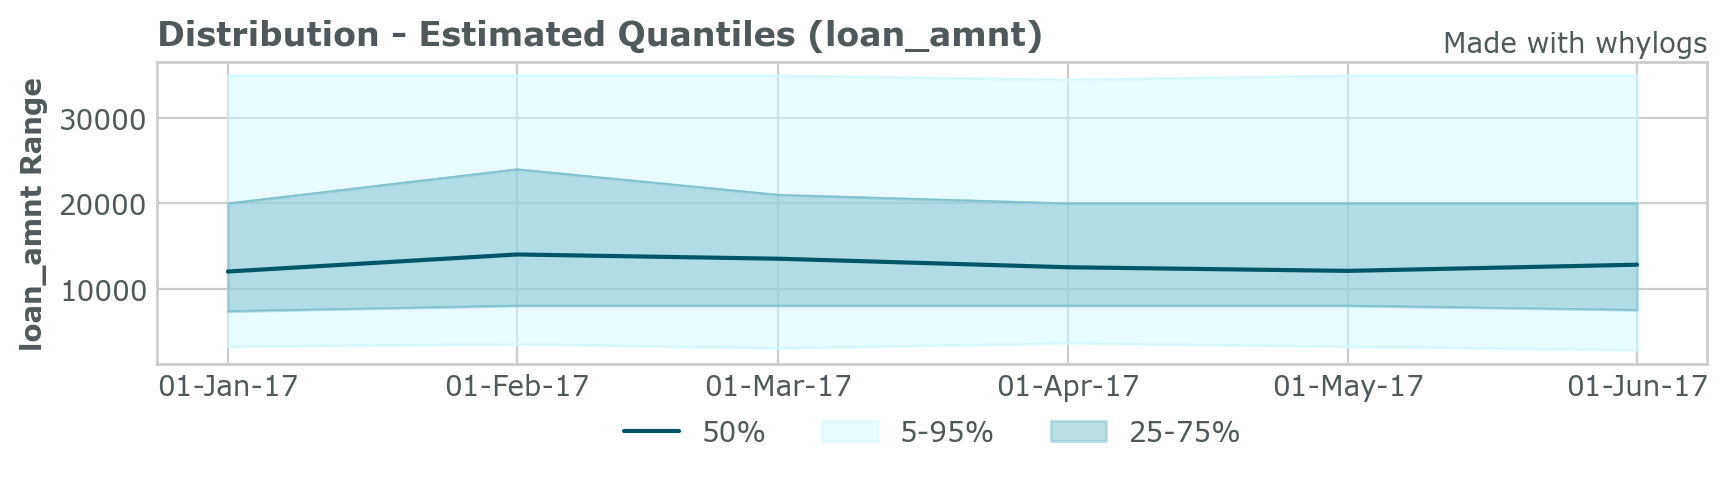

In [28]:
viz.plot_distribution("loan_amnt")

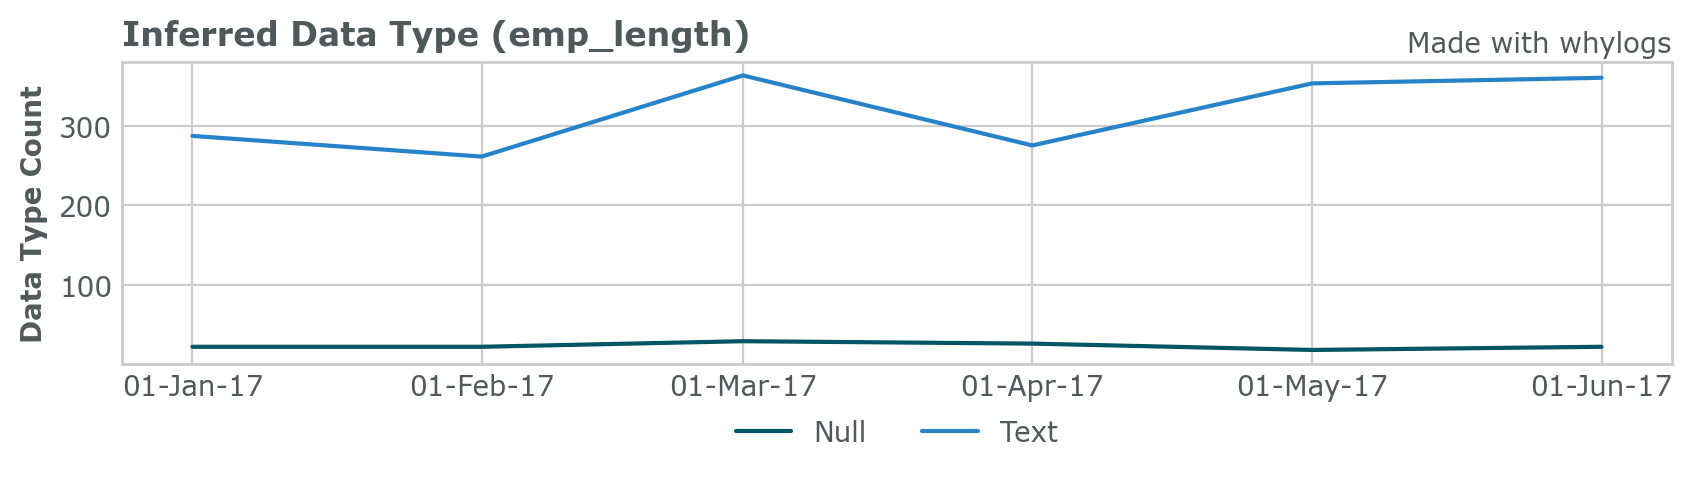

In [29]:
viz.plot_data_types("emp_length")

# Wrapping up

Once you're done with your session, you can close it. Closing a session will close all downstream loggers and force them to write to disk.

Note that dataset profiles are kept in memory, so they won't be discarded with the session. You can use them as long as you like!

In [30]:
session.close()